# Import Packages

In [79]:
# #DataHandling
import pandas as pd
import numpy as np
import seaborn as sns

# #TimeSeriesModeling
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA, ARMAResults, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR, ARResults
from pmdarima import auto_arima
!pip install pmdarima

# #Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# #TimeSeriesAnalysis
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# #Plotting
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import matplotlib.ticker as ticker
!pip install plotly

# #StatsModels
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# #WarningsAndSettings
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

# #Utilities
import itertools

# Holidays
!pip install holidays

# Pre-processing Data

## Import Data

In [3]:
file_path = 'E:/RFM CUSTOMER SEGMENTATION/AdventureWorksDW.xlsx'
raw_data = pd.read_excel(file_path, sheet_name=None)
print(raw_data.keys())

dict_keys(['FactInternetSales', 'DimProduct', 'DimSalesTerritory', 'DimDate', 'DimCustomer', 'DimGeography'])


## Select Sheet & Columns

In [4]:
df = raw_data['FactInternetSales']
df = df[['OrderDate', 'SalesAmount']]
print(df.head()) 

   OrderDate  SalesAmount
0 2005-07-22      3399.99
1 2007-07-22      2319.99
2 2007-07-22        21.98
3 2007-11-04      2384.07
4 2007-11-04        28.99


## Make Date As Index And Group 

In [5]:
df = df.groupby(by='OrderDate').agg({'SalesAmount':sum})
df.sort_index(inplace=True)
df.index = pd.to_datetime(df.index)
df

,SalesAmount
OrderDate,
2005-07-01,14477.3382
2005-07-02,13931.5200
2005-07-03,15012.1782
2005-07-04,7156.5400
2005-07-05,15012.1782
...,...
2008-07-27,1502.8500
2008-07-28,1747.6700
2008-07-29,1847.4600


## Add Columns

In [31]:
df['Year'] = df.index.year
df['Month'] = df.index.month

## Resample The Data

In [32]:
df = df.resample('MS').sum()
df

,SalesAmount,Year,Month
OrderDate,,,
2005-07-01,4.733882e+05,2005,7
2005-08-01,5.061917e+05,2005,8
2005-09-01,4.739430e+05,2005,9
2005-10-01,5.133295e+05,2005,10
2005-11-01,5.439934e+05,2005,11
2005-12-01,7.555279e+05,2005,12
2006-01-01,5.967466e+05,2006,1
2006-02-01,5.508167e+05,2006,2
2006-03-01,6.441352e+05,2006,3


# EDA and Visualization

## Plot DF

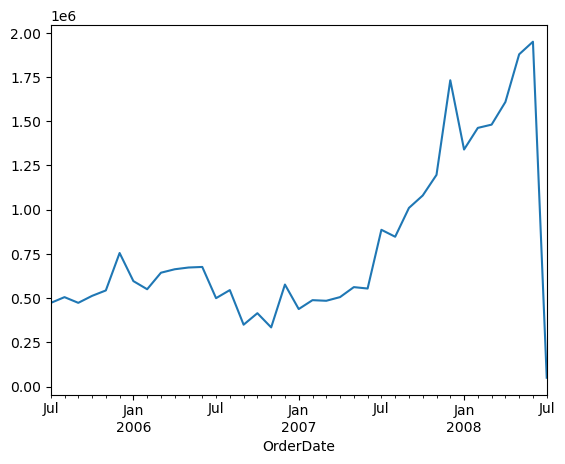

In [8]:
df['SalesAmount'].plot().autoscale(axis='x', tight=True)
plt.show()

## Is The Data Seasonal ?

## Seasonal Plot

In [33]:
df

,SalesAmount,Year,Month
OrderDate,,,
2005-07-01,4.733882e+05,2005,7
2005-08-01,5.061917e+05,2005,8
2005-09-01,4.739430e+05,2005,9
2005-10-01,5.133295e+05,2005,10
2005-11-01,5.439934e+05,2005,11
2005-12-01,7.555279e+05,2005,12
2006-01-01,5.967466e+05,2006,1
2006-02-01,5.508167e+05,2006,2
2006-03-01,6.441352e+05,2006,3


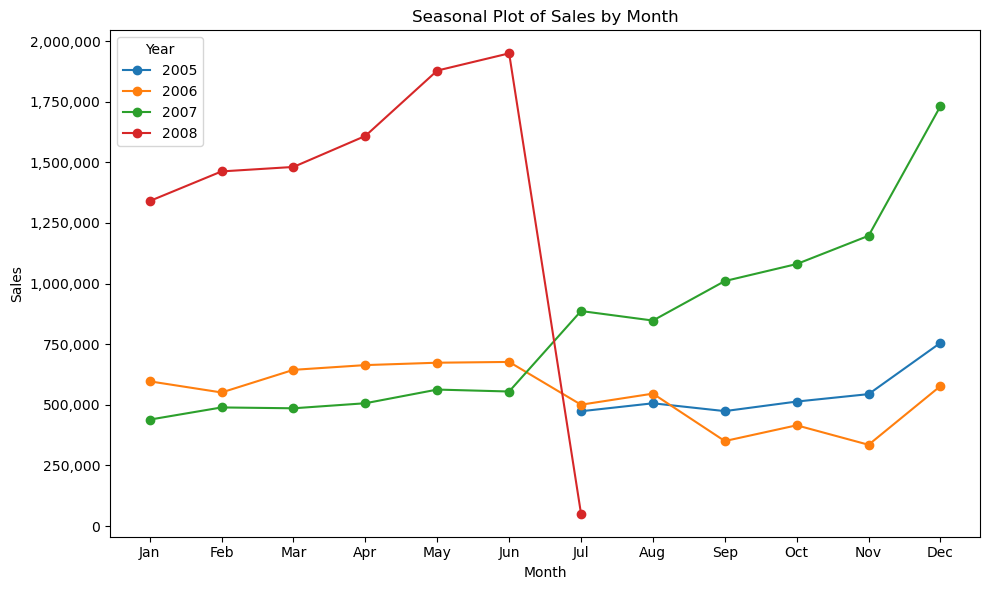

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

for year, data in df.groupby("Year"):
    monthly_sales = data.groupby("Month")["SalesAmount"].sum()
    months = monthly_sales.index
    ax.plot(months, monthly_sales, marker="o", label=year)


ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_xlabel("Month")
ax.set_ylabel("Sales")
ax.set_title("Seasonal Plot of Sales by Month")
ax.legend(title="Year")


ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

## Seasonal subseries plots

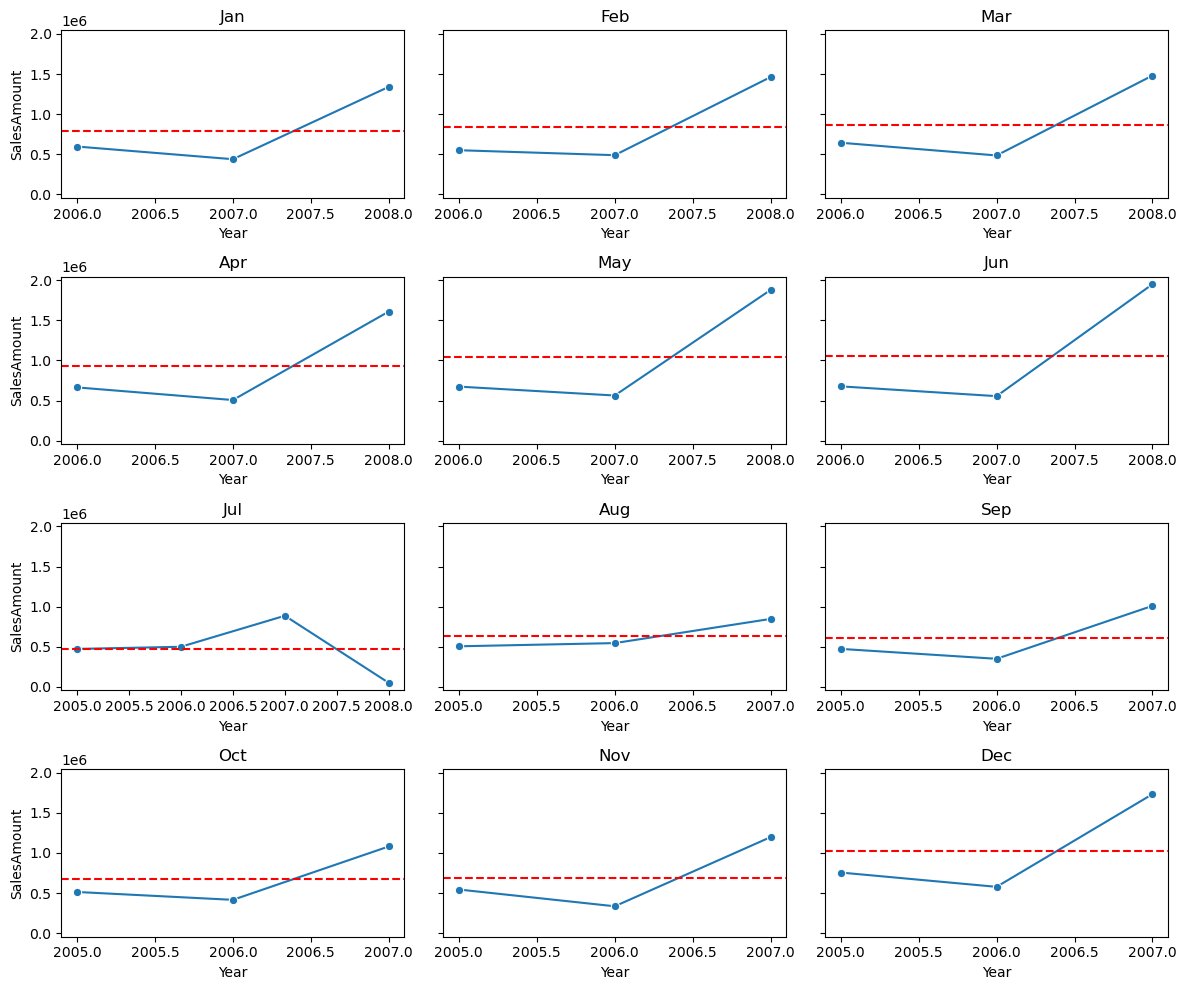

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharey=True)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i, month in enumerate(range(1, 13)):  
    ax = axes[i // 3, i % 3]  
    month_data = df[df["Month"] == month] 
    sns.lineplot(data=month_data, x="Year", y="SalesAmount", marker="o", ax=ax)
    
    ax.set_title(months[i])  
    ax.axhline(month_data["SalesAmount"].mean(), color='red', linestyle="--") 

plt.tight_layout()
plt.show()

## Seasonal Decompose

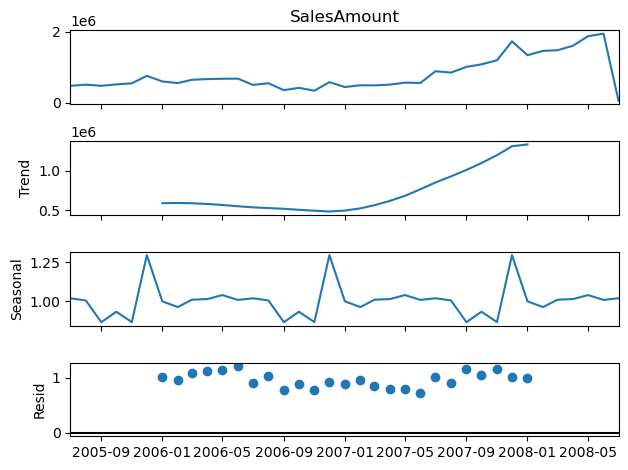

In [38]:
sdec = seasonal_decompose(df['SalesAmount'], model='multiplicative', period=12) 
sdec.plot()
plt.show()

## Conclusion

Overall, the decomposition confirms that the sales data exhibits both a strong seasonal pattern and a positive long-term trend, making seasonal time series models suitable for forecasting.

## Check Stationarity 

### Is There OutLiers ?

In [13]:
Q1 = df["SalesAmount"].quantile(0.25)
Q3 = df["SalesAmount"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["SalesAmount"] < (Q1 - 1.5 * IQR)) | (df["SalesAmount"] > (Q3 + 1.5 * IQR))]

if outliers.empty:
    print("No Outliers")
else:
    print(outliers)

            SalesAmount   Year  Month
OrderDate                            
2008-05-01   1878317.51  62248    155
2008-06-01   1949361.11  60240    180


### DF Test

In [14]:
# Make A Function
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [15]:
#Check Of Stationarity 
adf_test(df['SalesAmount'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.501074
p-value                  0.007960
# lags used              6.000000
# observations          30.000000
critical value (1%)     -3.669920
critical value (5%)     -2.964071
critical value (10%)    -2.621171
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Conclusion

The Data Is Stationarity But We Have Some Outliers At The End Of Data 

# Models

#### *Data Split*

In [16]:
split_point = int(len(df) * 0.8)
train = df.iloc[:split_point]
test = df.iloc[split_point:]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train)}")
print(f"Total test data size {len(test)}")

Total df size 37
Total train data size 29
Total test data size 8


## Model 1 - Holt-Winters Model

### Fit A Model

In [17]:
#Fitting Holt-Winters Multiplicative Method
HoltWinters_model = ExponentialSmoothing(train['SalesAmount'], trend='mul', seasonal='add', seasonal_periods=12).fit()
#Make Predictions
HoltWinters_predictions = HoltWinters_model.forecast(len(test))

### Predictions Vs Test Values

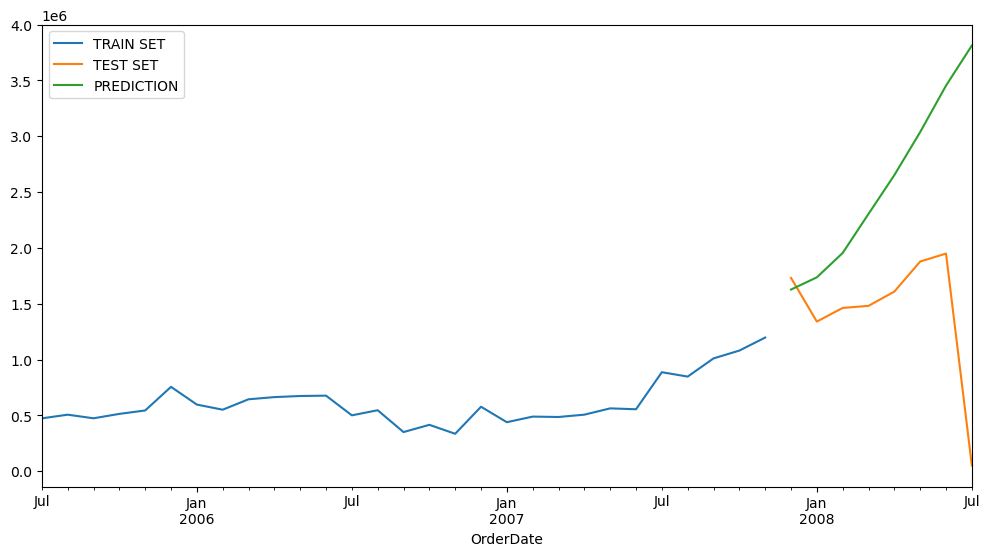

In [18]:
train['SalesAmount'].plot(legend=True, label='TRAIN SET')
test['SalesAmount'].plot(legend=True, label='TEST SET', figsize=(12, 6)).autoscale(axis='x', tight=True)
HoltWinters_predictions.plot(legend=True, label='PREDICTION')
plt.show()

In [19]:
for i in range(len(HoltWinters_predictions)):
    print(f"predicted={HoltWinters_predictions[i]:<11.10}, expected={test['SalesAmount'][i]}")

predicted=1626961.184, expected=1731787.77
predicted=1736522.458, expected=1340244.95
predicted=1954697.157, expected=1462479.8299999998
predicted=2304654.589, expected=1480905.18
predicted=2652253.535, expected=1608750.53
predicted=3037786.718, expected=1878317.5099999998
predicted=3453846.116, expected=1949361.11
predicted=3812920.445, expected=50840.630000000005


### Evalution Metrics

In [20]:
mae_error = mean_absolute_error(test['SalesAmount'], HoltWinters_predictions)
mse_error = mean_squared_error(test['SalesAmount'], HoltWinters_predictions)
rmse_error = np.sqrt(mean_squared_error(test['SalesAmount'], HoltWinters_predictions))
print(f"Mean absolute error is : {mae_error}")
print(f"Root mean squared error is : {rmse_error}")
print(f"Mean squared error is : {mse_error}")

Mean absolute error is : 1160825.9830036801
Root mean squared error is : 1578719.912394606
Mean squared error is : 2492356561791.233


In [21]:
test['SalesAmount'].describe()

count    8.000000e+00
mean     1.437836e+06
std      5.984556e+05
min      5.084063e+04
25%      1.431921e+06
50%      1.544828e+06
75%      1.768420e+06
max      1.949361e+06
Name: SalesAmount, dtype: float64

### Forecast in future

In [22]:
#Fitting Whole Data Into The Model
HoltWinters_model_w = ExponentialSmoothing(df['SalesAmount'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
#Make Predictions Of Whole Data
start = 0
end = len(df) - 1
HoltWinters_predictions = HoltWinters_model_w.predict(start=start, end=end)
#Forecast For Next 8 Months
HoltWinters_forecast = HoltWinters_model_w.forecast(6)

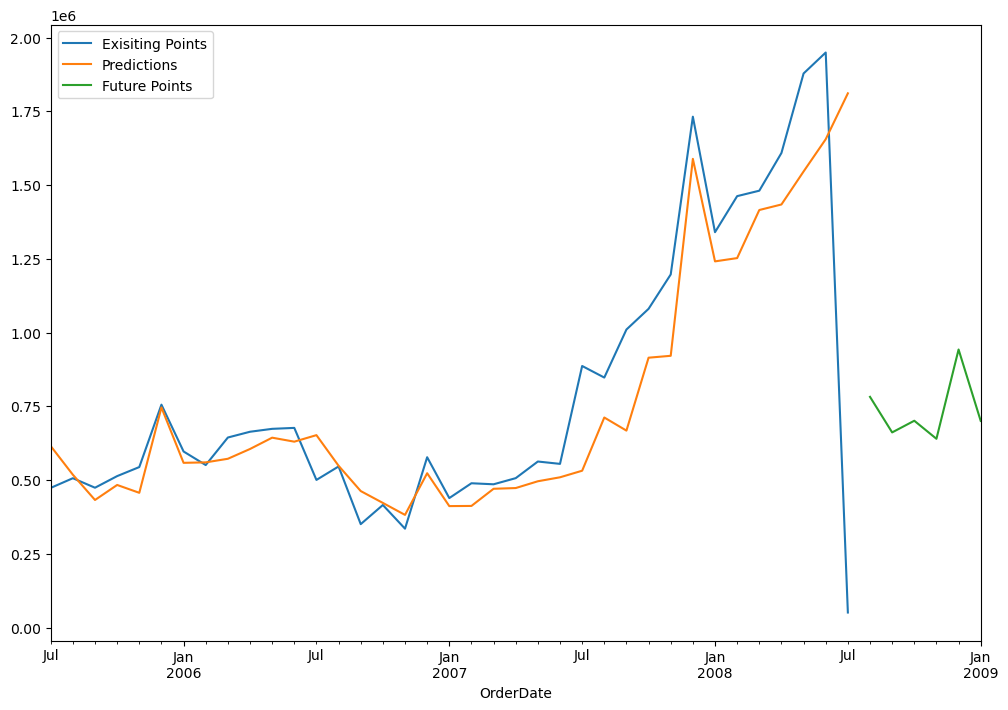

In [23]:
#Plot Forecast In Future
df['SalesAmount'].plot(figsize=(12, 8), legend=True, label='Exisiting Points')
HoltWinters_predictions.plot(figsize=(12, 8), legend=True, label='Predictions')
HoltWinters_forecast.plot(figsize=(12, 8), legend=True, label='Future Points')
plt.show()

### Choose Best Coeff.

##### PACF Plot

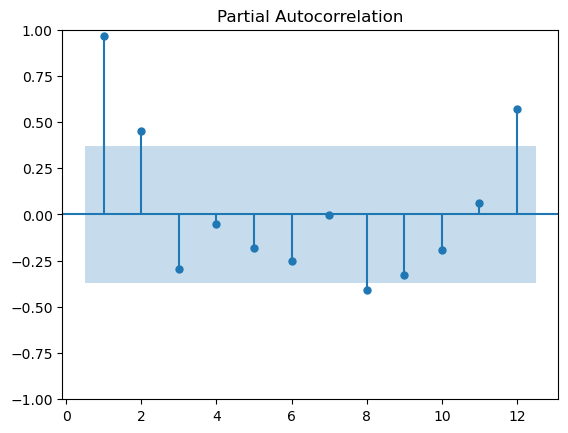

In [24]:
sgt.plot_pacf(train['SalesAmount'][1:], lags=12, zero=False, method='ols')

##### Check All Possible Coeff

In [25]:
# Make A Range Of Possible Orders
p = range(0,13)
order_ar = list(itertools.product(p,[0],[0]))

# Make A List To Choose Best Model
best_aic = np.inf
best_pq = None
temp_model = None

# Loop through all the parameters
for param in order_ar: 
    temp_model = sm.tsa.ARIMA(train['SalesAmount'], order=param)
    results = temp_model.fit()
    
    # Print the AIC for the current model
    print(f"Model with order {param} - AIC: {results.aic}")
    
    if results.aic < best_aic:
        best_aic = results.aic
        best_pq = param

print("Best AR {} model - AIC: {}".format(best_pq, best_aic))

Model with order (0, 0, 0) - AIC: 865.6126930042814
Model with order (1, 0, 0) - AIC: 767.92299288166
Model with order (2, 0, 0) - AIC: 768.0898611106397
Model with order (3, 0, 0) - AIC: 766.2356291873725
Model with order (4, 0, 0) - AIC: 768.015512122326
Model with order (5, 0, 0) - AIC: 768.9873877611632
Model with order (6, 0, 0) - AIC: 770.1568391656454
Model with order (7, 0, 0) - AIC: 771.9003773372558
Model with order (8, 0, 0) - AIC: 772.6690323374022
Model with order (9, 0, 0) - AIC: 774.562721373833
Model with order (10, 0, 0) - AIC: 776.3273543669977
Model with order (11, 0, 0) - AIC: 777.404888566659
Model with order (12, 0, 0) - AIC: 778.571026213002
Best AR (3, 0, 0) model - AIC: 766.2356291873725


### Fit A Model

In [26]:
model_ar_3 = sm.tsa.ARIMA(train['SalesAmount'], order = (3,0,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SalesAmount   No. Observations:                   29
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -378.118
Date:                Fri, 09 May 2025   AIC                            766.236
Time:                        15:41:08   BIC                            773.072
Sample:                    07-01-2005   HQIC                           768.377
                         - 11-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.157e+05   1.94e+05      3.169      0.002    2.35e+05    9.97e+05
ar.L1          0.7831      0.260      3.012      0.003       0.274       1.293
ar.L2          0.4749      0.289      1.641      0.101      -0.092       1.042
ar.L3         -0.3766      0.251     -1.503      0.133      -0.868       0.115
sigma2      1.252e+10      4.711   2.66e+09      0.000    1.25e+10    1.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.83   Prob(JB):                         0.46
Heteroskedasticity (H):               1.37   Skew:                             0.54
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.88e+25. Standard errors may be unstable.
"""

### Predictions 

##### Make A Predictions

In [27]:
#Make A Predictions
start=len(train)
end=len(train)+len(test)-1
predictions_ar_1 = result_ar_1.predict(start=start, end=end, dynamic=False)

NameError: name 'result_ar_1' is not defined

##### Predictions Vs Test Values

In [ ]:
train['SalesReturns'].plot(legend=True, label='TRAIN SET')
test['SalesReturns'].plot(legend=True, label='TEST SET', figsize=(12, 6)).autoscale(axis='x', tight=True)
predictions_ar_1 .plot(legend=True, label='PREDICTION')
plt.show()

In [ ]:
#View Values Of Test Set Vs Predictions
for i in range(len(predictions_ar_1)):
    print(f"predicted={predictions_ar_1[i]:<11.10}, expected={test['SalesReturns'][i]}")

### Evalution Metrics

In [ ]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['SalesReturns'], predictions_ar_1))
rmse = round(rmse, 3)

# Mean Absolute Percentage Error
abs_error = np.abs(test['SalesReturns']-predictions_ar_1)
actual = test['SalesReturns']
mape = np.round(np.mean(np.abs(abs_error/actual)),3)

# Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Method':['Autoregressive'], 'RMSE': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'RMSE', 'MAPE']]
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

### Forecasting In The Future 

In [ ]:
#fit the model over whole data
model_AR = sm.tsa.ARIMA(df['SalesReturns'][1:], order=(1,0,0))
result_AR = model_AR.fit()
result_AR.summary()

#### All Data Predictions

In [ ]:
start = 0
end = len(df) - 1
predictions_AR = result_AR.predict(start=start, end=end, dynamic=False)

#### Forecast Next 12 Months

In [ ]:
start = len(df)
end = len(df)+12
forecast_AR = result_AR.predict(start=start, end=end, dynamic=False)

In [ ]:
#Plot Forecasting 
df['SalesReturns'].plot()
predictions_AR.plot()
forecast_AR.plot()
plt.show()

### Choose Best Coeff.

#### ACF Plot

In [ ]:
sgt.plot_acf(train['SalesReturns'][1:], lags=12, zero=False)

#### Choose Best Coeff.

In [ ]:
# Make A Range Of Possible Orders
q = range(0,13)
order_ma = list(itertools.product([0],[0],q))

# Make A List To Choose Best Model
best_aic = np.inf
best_pq = None
temp_model = None

# Loop through all the parameters
for param in order_ma: 
    temp_model = sm.tsa.ARIMA(train['SalesReturns'], order=param)
    results = temp_model.fit()
    
    # Print the AIC for the current model
    print(f"Model with order {param} - AIC: {results.aic}")
    
    if results.aic < best_aic:
        best_aic = results.aic
        best_pq = param

print("Best MA {} model - AIC: {}".format(best_pq, best_aic))

### Fit A Model

In [ ]:
model_ma_1 = sm.tsa.ARIMA(train['SalesReturns'], order = (0,0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()

#### Predictions

In [ ]:
#Make A Predictions
start=len(train)
end=len(train)+len(test)-1
predictions_ma_1 = result_ma_1.predict(start=start, end=end, dynamic=False)

#### Predictions Vs Test Values

In [ ]:
train['SalesReturns'].plot(legend=True, label='TRAIN SET')
test['SalesReturns'].plot(legend=True, label='TEST SET', figsize=(12, 6)).autoscale(axis='x', tight=True)
predictions_ma_1 .plot(legend=True, label='PREDICTION')
plt.show()

In [ ]:
#View Values Of Test Set Vs Predictions
for i in range(len(predictions_ma_1)):
    print(f"predicted={predictions_ma_1[i]:<11.10}, expected={test['SalesReturns'][i]}")

### Choose Best Coeff.

In [59]:
# Make A Range Of Possible Orders
p = range(0,13)
q = range(0,3)
order_arma = list(itertools.product(p,[0],q))

# Make A List To Choose Best Model
best_aic = np.inf
best_pq = None
temp_model = None

# Loop through all the parameters
for param in order_arma: 
    temp_model = sm.tsa.ARIMA(train['SalesAmount'], order=param)
    results = temp_model.fit()
    
    # Print the AIC for the current model
    print(f"Model with order {param} - AIC: {results.aic}")
    
    if results.aic < best_aic:
        best_aic = results.aic
        best_pq = param

print("Best AR {} model - AIC: {}".format(best_pq, best_aic))

Model with order (0, 0, 0) - AIC: 865.6126930042814
Model with order (0, 0, 1) - AIC: 787.6511456439558
Model with order (0, 0, 2) - AIC: 782.2586668555366
Model with order (1, 0, 0) - AIC: 767.92299288166
Model with order (1, 0, 1) - AIC: 769.220925044262
Model with order (1, 0, 2) - AIC: 767.4345998186548
Model with order (2, 0, 0) - AIC: 768.0898611106397
Model with order (2, 0, 1) - AIC: 768.122825941671
Model with order (2, 0, 2) - AIC: 769.1524393456189
Model with order (3, 0, 0) - AIC: 766.2356291873725
Model with order (3, 0, 1) - AIC: 767.094694591431
Model with order (3, 0, 2) - AIC: 768.3457491921708
Model with order (4, 0, 0) - AIC: 768.015512122326
Model with order (4, 0, 1) - AIC: 769.1295610766373
Model with order (4, 0, 2) - AIC: 770.3704880913288
Model with order (5, 0, 0) - AIC: 768.9873877611632
Model with order (5, 0, 1) - AIC: 770.3125660805748
Model with order (5, 0, 2) - AIC: 770.5996461884137
Model with order (6, 0, 0) - AIC: 770.1568391656454
Model with order (

## Model 2 - Seasonal Autoregressive Moving Average (SARIMA)

### Fit The Model

In [60]:
model_sarima = SARIMAX(train['SalesAmount'],order=(3,0,0),seasonal_order=(0,0,0,0), enforce_invertibility=False, enforce_stationarity=False)
result_sarima = model_sarima.fit()
result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SalesAmount   No. Observations:                   29
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -338.578
Date:                Fri, 09 May 2025   AIC                            685.156
Time:                        15:51:35   BIC                            690.188
Sample:                    07-01-2005   HQIC                           686.605
                         - 11-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7514      0.274      2.742      0.006       0.214       1.289
ar.L2          0.5536      0.253      2.191      0.028       0.058       1.049
ar.L3         -0.2593      0.262     -0.989      0.323      -0.773       0.255
sigma2      1.198e+10   5.29e-12   2.26e+21      0.000     1.2e+10     1.2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               0.99   Skew:                             0.45
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+37. Standard errors may be unstable.
"""

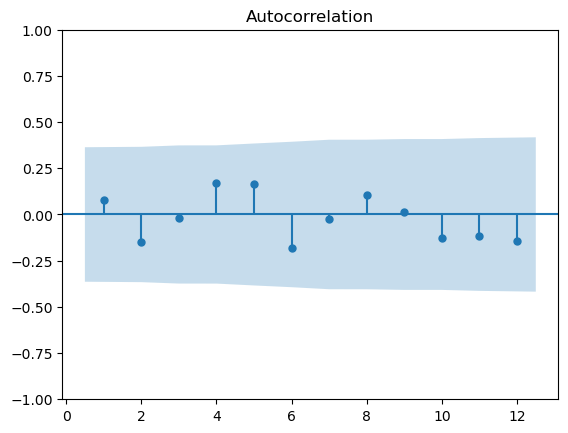

In [61]:
residuals = result_sarima.resid
sgt.plot_acf(residuals, lags=12, zero=False)

In [62]:
acorr_ljungbox(residuals, lags=[5, 10, 15], return_df=True)

,lb_stat,lb_pvalue
5,2.999447,0.700071
10,5.545765,0.851875
15,11.314725,0.729982


### Predictions

In [63]:
#Make A Predictions
start= len(train)
end=len(train)+len(test)-1
predictions_sarima = result_sarima.predict(start=start, end=end, dynamic=False)

#### Predictions Vs Test Values

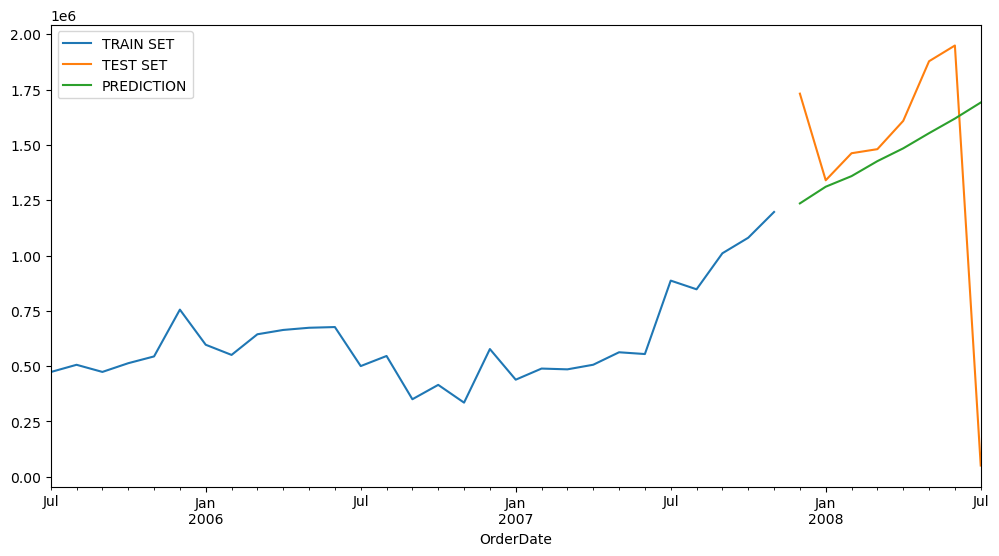

In [65]:
train['SalesAmount'].plot(legend=True, label='TRAIN SET')
test['SalesAmount'].plot(legend=True, label='TEST SET', figsize=(12, 6)).autoscale(axis='x', tight=True)
predictions_sarima.plot(legend=True, label='PREDICTION')
plt.show()

In [66]:
# Ensure we don't go out of bounds
for i in range(min(len(predictions_sarima), len(test['SalesAmount']))):
    print(f"predicted={predictions_sarima[i]:<11.10}, expected={test['SalesAmount'].iloc[i]}")

predicted=1235712.148, expected=1731787.77
predicted=1311133.956, expected=1340244.95
predicted=1359040.072, expected=1462479.8299999998
predicted=1426753.104, expected=1480905.18
predicted=1484604.047, expected=1608750.53
predicted=1553143.515, expected=1878317.5099999998
predicted=1619119.764, expected=1949361.11
predicted=1691644.193, expected=50840.630000000005


In [67]:
mae_error = mean_absolute_error(test['SalesAmount'], predictions_sarima)
mse_error = mean_squared_error(test['SalesAmount'], predictions_sarima)
rmse_error = np.sqrt(mean_squared_error(test['SalesAmount'], predictions_sarima))
print(f"Mean absolute error is : {mae_error}")
print(f"Root mean squared error is : {rmse_error}")
print(f"Mean squared error is : {mse_error}")

Mean absolute error is : 387892.97956103995
Root mean squared error is : 630775.0053940864
Mean squared error is : 397877107429.9097


In [70]:
#fit the model over whole data
model_SARIMA = SARIMAX(df['SalesAmount'],order=(3,0,0),seasonal_order=(0,0,0,0), enforce_invertibility=False, enforce_stationarity=False)
result_SARIMA = model_SARIMA.fit()
result_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SalesAmount   No. Observations:                   37
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -482.539
Date:                Fri, 09 May 2025   AIC                            973.078
Time:                        15:52:15   BIC                            979.184
Sample:                    07-01-2005   HQIC                           975.160
                         - 07-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5233      1.284      0.408      0.684      -1.993       3.040
ar.L2          0.0902      1.001      0.090      0.928      -1.871       2.051
ar.L3          0.3642      1.175      0.310      0.757      -1.938       2.667
sigma2      1.244e+11   2.97e-11   4.19e+21      0.000    1.24e+11    1.24e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               446.63
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              36.68   Skew:                            -3.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.54e+37. Standard errors may be unstable.
"""

In [71]:
start = 0
end = len(df) - 1
predictions_SARIMA = result_SARIMA.predict(start=start, end=end, dynamic=False)

In [72]:
start = len(df)
end = len(df)+8
forecast_SARIMA = result_SARIMA.predict(start=start, end=end, dynamic=False)

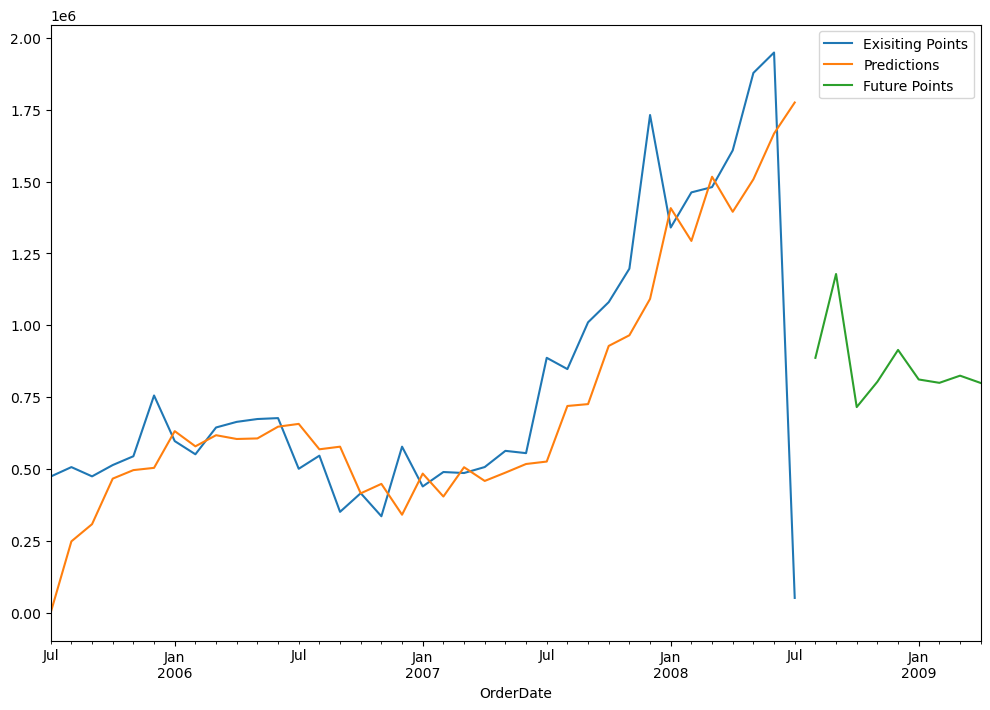

In [74]:
df['SalesAmount'].plot(figsize=(12, 8), legend=True, label='Exisiting Points')
predictions_SARIMA.plot(figsize=(12, 8), legend=True, label='Predictions')
forecast_SARIMA.plot(figsize=(12, 8), legend=True, label='Future Points')
plt.show()